In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().any()
#No Null Values

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [4]:
df['Class'].value_counts()
#0 legitmate transaction
#1 fraud

0    284315
1       492
Name: Class, dtype: int64

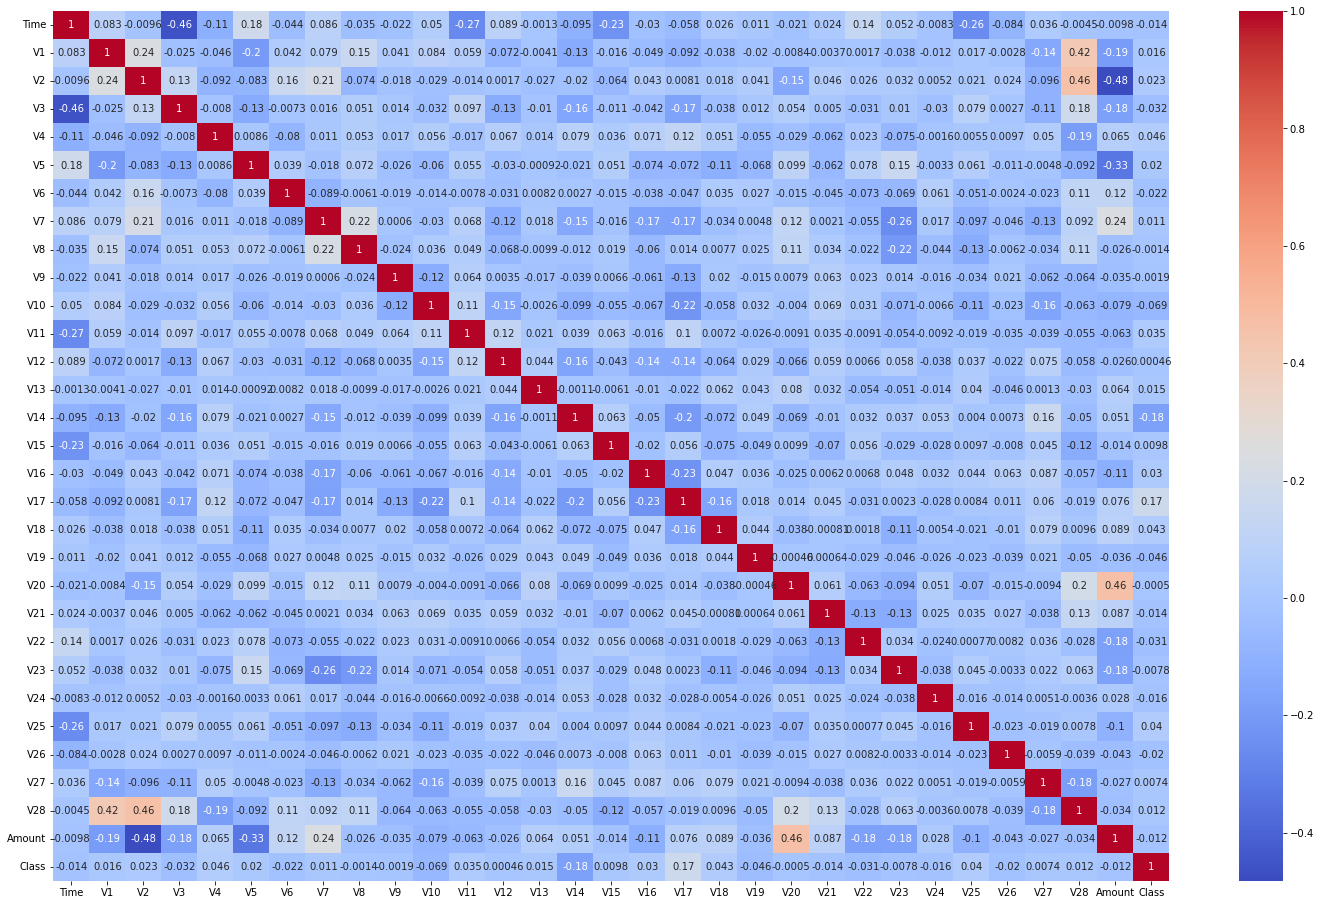

In [5]:
plt.figure(figsize=(25, 16))
sns.heatmap(df.sample(1000).corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
X = df.drop(columns='Class')
y= df['Class']


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error
#metrics for evaluating the model

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Splitting the data

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#Algorithms we will work with

In [11]:
#this method is used to find out the best paramaters to use in KNN
neighbors = np.arange(1, 6) 
train_accuracies = {}
test_accuracies = {}
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

In [12]:
test_accuracies
#best one is 3

{1: 0.9982795547909132,
 2: 0.9984199992977775,
 3: 0.9984375548611355,
 4: 0.9983673326077034,
 5: 0.9983673326077034}

In [13]:
train_accuracies

{1: 1.0,
 2: 0.9986306480282648,
 3: 0.9986438148741469,
 4: 0.9984419232372885,
 5: 0.9984507011345433}

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

KNN_SCORES = {'Accuracy': accuracy_knn, 'Precision':precision_knn , 'Recall': recall_knn}

In [15]:
AMSE = mean_squared_error(y_test, y_pred_knn)
KNN_SCORES['AMSE'] = AMSE                        
KNN_SCORES


{'Accuracy': 0.9984375548611355,
 'Precision': 1.0,
 'Recall': 0.09183673469387756,
 'AMSE': 0.0015624451388645062}

In [16]:
confusion_matrix_knn
# this matrix shows the first column of valid transaction that went through is 56864, but 89 were mistakenly made fraud
#the secound column shows there were 9 fraud transactions, none made it through and all of them were detected successfully

array([[56864,     0],
       [   89,     9]], dtype=int64)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([
        ('scaler', StandardScaler()), 
        ('classifier', LogisticRegression())
    ])
#creating a pipeline to merge both steps into one

In [18]:
pipe.fit(X_train, y_train)
y_pred_log = pipe.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
AMSE_log = mean_squared_error(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)

LOG_SCORES = {'Accuracy': accuracy_log, 'Precision':precision_log , 'Recall': recall_log, 'AMSE':AMSE_log}


In [19]:
LOG_SCORES
#Scores of the logistic regression

{'Accuracy': 0.9991222218320986,
 'Precision': 0.8636363636363636,
 'Recall': 0.5816326530612245,
 'AMSE': 0.0008777781679014079}

In [20]:
confusion_matrix_log
# this matrix shows the first column of valid transaction that went through is 56855, but 41 were mistakenly made fraud
#the secound column shows there were 66 fraud transactions, 9 made it through and 57 of them were detected successfully

array([[56855,     9],
       [   41,    57]], dtype=int64)